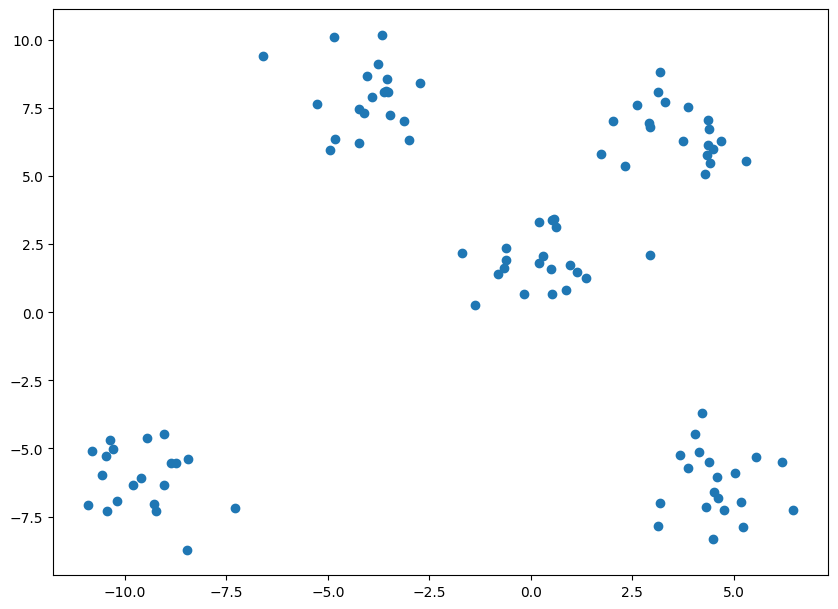

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.scatter(X[:, 0], X[:, 1]);



In [2]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(X)
y_pred = Cluster.predict(X)


In [3]:
from sklearn.cluster import KMeans

In [4]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(X)
y_pred = Cluster.predict(X)


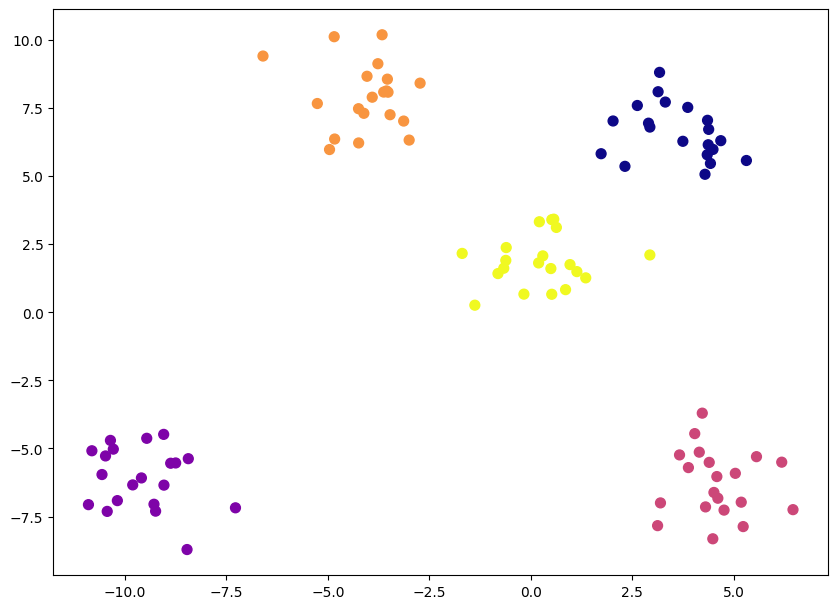

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='plasma')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})


In [7]:
#EX2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# using the make_blobs dataset
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=5, random_state=101)
# setting the number of training examples
m=X.shape[0]
n=X.shape[1] 
n_iter=200


In [8]:
# computing the initial centroids randomly
K=5
import random

# creating an empty centroid array
centroids=np.array([]).reshape(n,0) 

# creating 5 random centroids
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]


In [9]:
output={}

# creating an empty array
euclid=np.array([]).reshape(m,0)

# finding distance for each centroid
for k in range(K):
       dist=np.sum((X-centroids[:,k])**2,axis=1)
       euclid=np.c_[euclid,dist]

# storing the minimum value we have computed
minimum=np.argmin(euclid,axis=1)+1

# computing the mean of separated clusters
for i in range(n_iter):
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(2,0)


# assigning of clusters to points
    for k in range(m):
        cent[minimum[k]]=np.c_[cent[minimum[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    
# computing mean and updating it
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0)
    final=cent

Text(0.5, 1.0, 'Original Dataset')

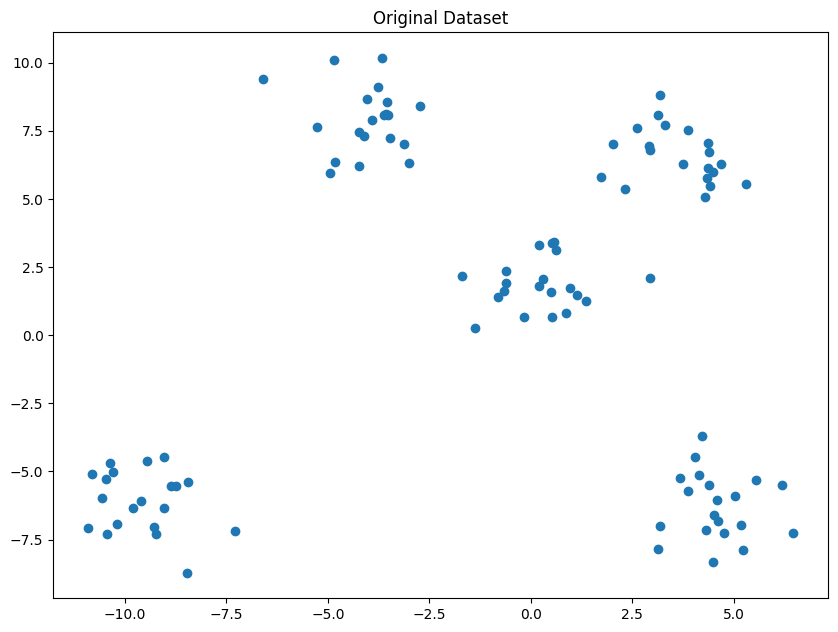

In [10]:

plt.scatter(X[:,0],X[:,1])
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('Original Dataset')


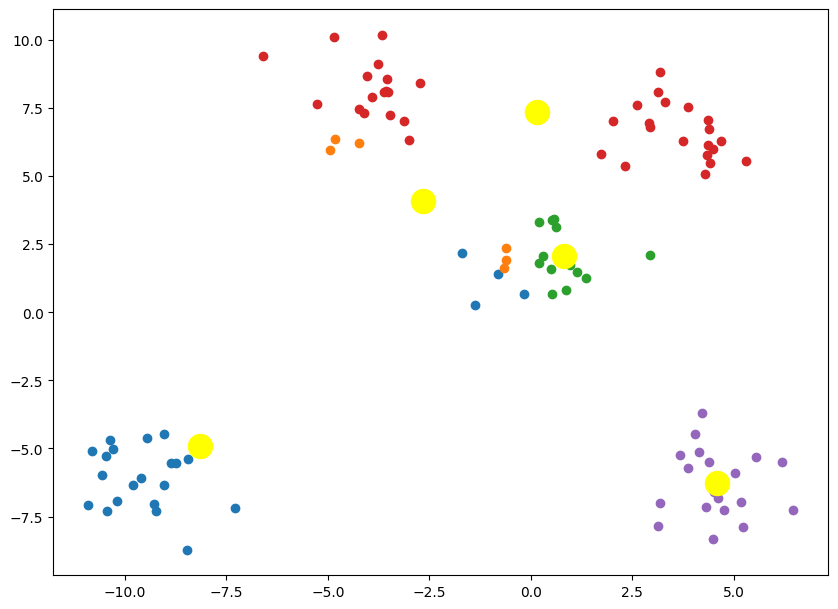

In [11]:
for k in range(K):
    plt.scatter(final[k+1][:,0],final[k+1][:,1])
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.show()


In [12]:
#EX3
from sklearn.datasets.samples_generator import make_blobs
import seaborn as sns
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=100, centers=5, random_state=101)


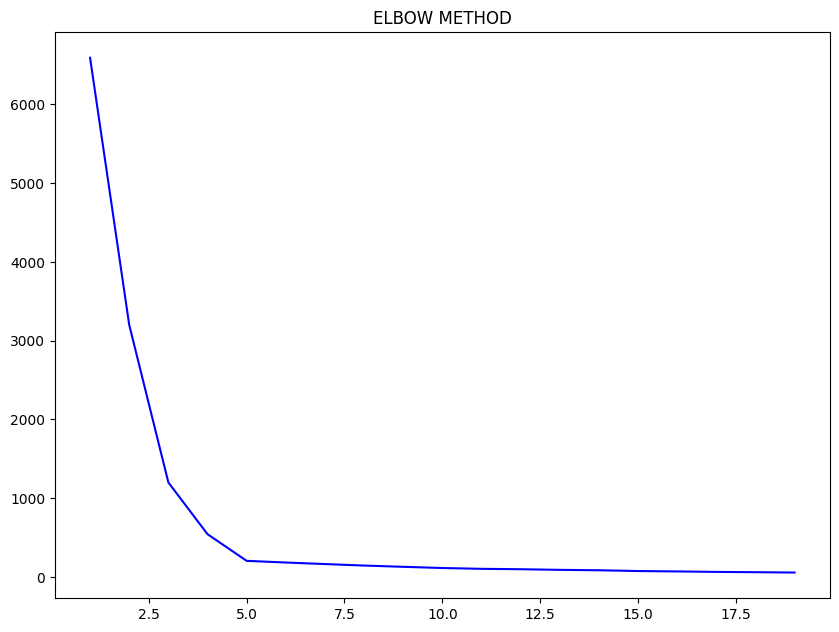

In [13]:
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()


In [14]:
#EX4
df=pd.read_csv("Mall_Customers.csv")
df.head()



,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


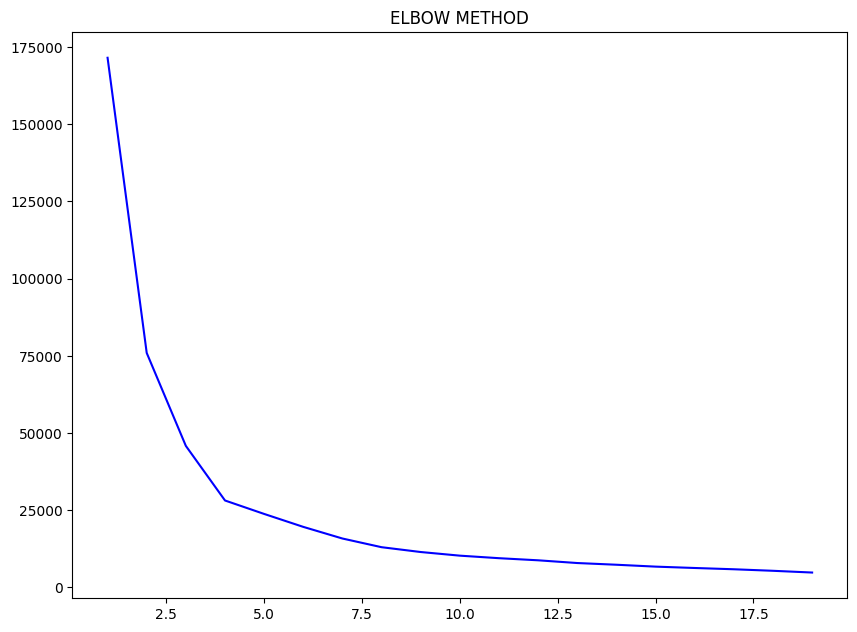

In [15]:
X = df.iloc[:, [2, 4]].values
from sklearn.cluster import KMeans
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101)
    kmeans.fit(X)
    elbow.append(kmeans.inertia_)
import seaborn as sns
sns.lineplot(range(1, 20), elbow,color='blue')
plt.rcParams.update({'figure.figsize':(10,7.5), 'figure.dpi':100})
plt.title('ELBOW METHOD')
plt.show()


No handles with labels found to put in legend.


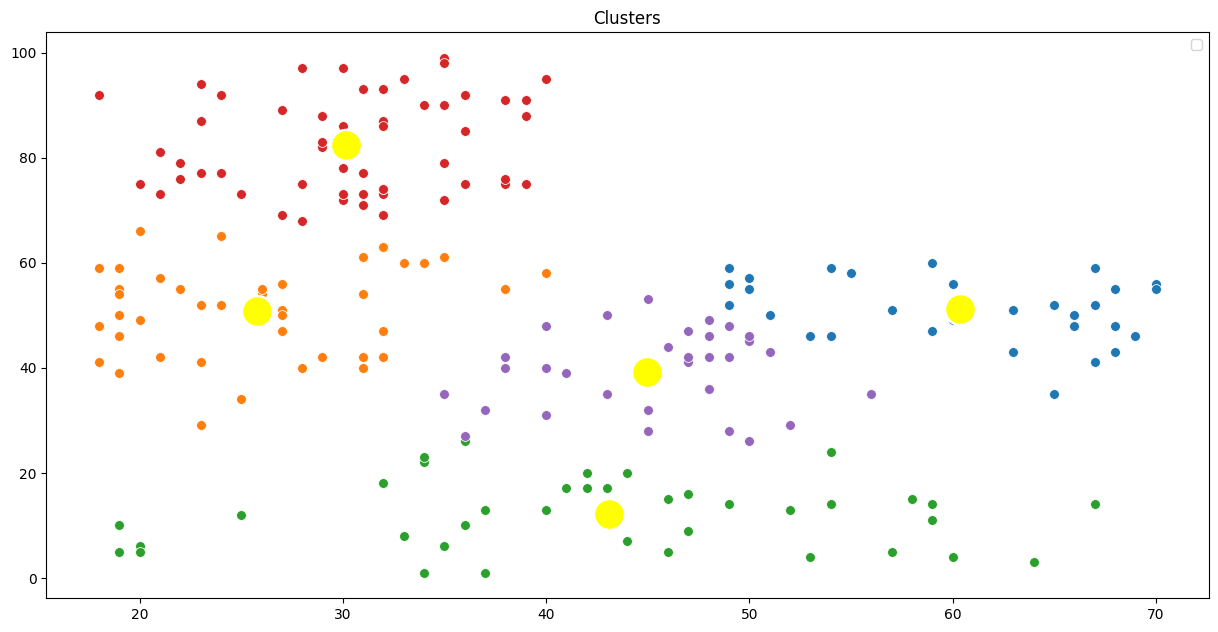

In [16]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(15,7.5))
sns.scatterplot(X[y_pred == 0, 0], X[y_pred == 0, 1],s=50)
sns.scatterplot(X[y_pred == 1, 0], X[y_pred == 1, 1],s=50)
sns.scatterplot(X[y_pred == 2, 0], X[y_pred == 2, 1],s=50)
sns.scatterplot(X[y_pred == 3, 0], X[y_pred == 3, 1],s=50)
sns.scatterplot(X[y_pred == 4, 0], X[y_pred == 4, 1],s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=500,color='yellow')
plt.title('Clusters')
plt.legend()
plt.show()
